# To build a model for AlexNet Convolution neural network:


In [1]:
import tensorflow as tf
import tensorflow.keras.backend as K

In [2]:
from tensorflow.keras.models import Model

In [3]:
from tensorflow.keras.models import Sequential

In [4]:
from tensorflow.keras.layers import Input

In [5]:
from tensorflow.keras.layers import Dense

In [6]:
from tensorflow.keras.layers import Flatten

In [7]:
from tensorflow.keras.layers import Conv2D

In [8]:
from tensorflow.keras.layers import MaxPooling2D

In [9]:
from tensorflow.keras.layers import Dropout

In [10]:
from tensorflow.keras.layers import LeakyReLU

In [11]:
from tensorflow.keras.layers import Activation

In [12]:
from tensorflow.keras.optimizers import Adam

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [15]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(256))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# 2nd Fully Connected Layer
model.add(Dense(96))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# 3rd Fully Connected Layer
model.add(Dense(32))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Output Layer
model.add(Dense(3))
model.add(Activation('softmax'))
model.summary()

# Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy','Precision','Recall','TruePositives','TrueNegatives','FalsePositives','FalseNegatives'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
flatten (Flatten)            (None, 69984)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               17916160  
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [19]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [20]:
training_set=train_datagen.flow_from_directory('Data/train',target_size=(224,224),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('Data/test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 1448 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [21]:
img_dims = 150
epochs = 100
batch_size = 50

In [22]:
#### Fitting the model
history = model.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 28 steps, validate for 25 steps
Epoch 1/100
28/28 [==============================] - 265s 9s/step - loss: 1.2093 - accuracy: 0.3601 - Precision: 0.3286 - Recall: 0.0264 - TruePositives: 23.0000 - TrueNegatives: 1697.0000 - FalsePositives: 47.0000 - FalseNegatives: 849.0000 - val_loss: 1.0957 - val_accuracy: 0.2937 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_TruePositives: 0.0000e+00 - val_TrueNegatives: 1600.0000 - val_FalsePositives: 0.0000e+00 - val_FalseNegatives: 800.0000
Epoch 2/100
28/28 [==============================] - 174s 6s/step - loss: 1.0420 - accuracy: 0.5045 - Precision: 0.4667 - Recall: 0.0469 - TruePositives: 42.0000 - TrueNegatives: 1744.0000 - FalsePositives: 48.0000 - FalseNegatives: 854.0000 - val_loss: 0.8495 - val_accuracy: 0.7475 - val_Precision: 0.9423 - val_Recall: 0.0613 - val_TruePositives: 49.0000 - val_TrueNegatives: 1597.0000 - val_FalsePositives: 3.0000 - val_FalseNegatives: 751.

Epoch 19/100
28/28 [==============================] - 3513s 125s/step - loss: 0.4274 - accuracy: 0.8326 - Precision: 0.8468 - Recall: 0.8050 - TruePositives: 702.0000 - TrueNegatives: 1617.0000 - FalsePositives: 127.0000 - FalseNegatives: 170.0000 - val_loss: 0.3216 - val_accuracy: 0.8850 - val_Precision: 0.8939 - val_Recall: 0.8637 - val_TruePositives: 691.0000 - val_TrueNegatives: 1518.0000 - val_FalsePositives: 82.0000 - val_FalseNegatives: 109.0000
Epoch 20/100
28/28 [==============================] - 119s 4s/step - loss: 0.3994 - accuracy: 0.8589 - Precision: 0.8696 - Recall: 0.8337 - TruePositives: 727.0000 - TrueNegatives: 1635.0000 - FalsePositives: 109.0000 - FalseNegatives: 145.0000 - val_loss: 0.2791 - val_accuracy: 0.9000 - val_Precision: 0.9103 - val_Recall: 0.8875 - val_TruePositives: 710.0000 - val_TrueNegatives: 1530.0000 - val_FalsePositives: 70.0000 - val_FalseNegatives: 90.0000
Epoch 21/100
28/28 [==============================] - 130s 5s/step - loss: 0.3707 - accura

28/28 [==============================] - 120s 4s/step - loss: 0.3286 - accuracy: 0.8819 - Precision: 0.8939 - Recall: 0.8601 - TruePositives: 750.0000 - TrueNegatives: 1655.0000 - FalsePositives: 89.0000 - FalseNegatives: 122.0000 - val_loss: 0.3051 - val_accuracy: 0.8775 - val_Precision: 0.8895 - val_Recall: 0.8650 - val_TruePositives: 692.0000 - val_TrueNegatives: 1514.0000 - val_FalsePositives: 86.0000 - val_FalseNegatives: 108.0000
Epoch 38/100
28/28 [==============================] - 121s 4s/step - loss: 0.3344 - accuracy: 0.8911 - Precision: 0.9076 - Recall: 0.8784 - TruePositives: 766.0000 - TrueNegatives: 1666.0000 - FalsePositives: 78.0000 - FalseNegatives: 106.0000 - val_loss: 0.2756 - val_accuracy: 0.9013 - val_Precision: 0.9071 - val_Recall: 0.8913 - val_TruePositives: 713.0000 - val_TrueNegatives: 1527.0000 - val_FalsePositives: 73.0000 - val_FalseNegatives: 87.0000
Epoch 39/100
28/28 [==============================] - 124s 4s/step - loss: 0.3349 - accuracy: 0.8795 - Preci

28/28 [==============================] - 120s 4s/step - loss: 0.2764 - accuracy: 0.8962 - Precision: 0.8993 - Recall: 0.8873 - TruePositives: 795.0000 - TrueNegatives: 1703.0000 - FalsePositives: 89.0000 - FalseNegatives: 101.0000 - val_loss: 0.2859 - val_accuracy: 0.8863 - val_Precision: 0.8944 - val_Recall: 0.8788 - val_TruePositives: 703.0000 - val_TrueNegatives: 1517.0000 - val_FalsePositives: 83.0000 - val_FalseNegatives: 97.0000
Epoch 56/100
28/28 [==============================] - 120s 4s/step - loss: 0.2346 - accuracy: 0.9107 - Precision: 0.9144 - Recall: 0.9062 - TruePositives: 812.0000 - TrueNegatives: 1716.0000 - FalsePositives: 76.0000 - FalseNegatives: 84.0000 - val_loss: 0.2550 - val_accuracy: 0.9062 - val_Precision: 0.9123 - val_Recall: 0.8975 - val_TruePositives: 718.0000 - val_TrueNegatives: 1531.0000 - val_FalsePositives: 69.0000 - val_FalseNegatives: 82.0000
Epoch 57/100
28/28 [==============================] - 124s 4s/step - loss: 0.2905 - accuracy: 0.8899 - Precisi

28/28 [==============================] - 121s 4s/step - loss: 0.2299 - accuracy: 0.9174 - Precision: 0.9223 - Recall: 0.9141 - TruePositives: 819.0000 - TrueNegatives: 1723.0000 - FalsePositives: 69.0000 - FalseNegatives: 77.0000 - val_loss: 0.2414 - val_accuracy: 0.8825 - val_Precision: 0.8847 - val_Recall: 0.8825 - val_TruePositives: 706.0000 - val_TrueNegatives: 1508.0000 - val_FalsePositives: 92.0000 - val_FalseNegatives: 94.0000
Epoch 74/100
28/28 [==============================] - 123s 4s/step - loss: 0.2478 - accuracy: 0.9106 - Precision: 0.9145 - Recall: 0.9071 - TruePositives: 791.0000 - TrueNegatives: 1670.0000 - FalsePositives: 74.0000 - FalseNegatives: 81.0000 - val_loss: 0.2492 - val_accuracy: 0.8863 - val_Precision: 0.8897 - val_Recall: 0.8775 - val_TruePositives: 702.0000 - val_TrueNegatives: 1513.0000 - val_FalsePositives: 87.0000 - val_FalseNegatives: 98.0000
Epoch 75/100
28/28 [==============================] - 125s 4s/step - loss: 0.2471 - accuracy: 0.9096 - Precisio

28/28 [==============================] - 122s 4s/step - loss: 0.1889 - accuracy: 0.9300 - Precision: 0.9370 - Recall: 0.9209 - TruePositives: 803.0000 - TrueNegatives: 1690.0000 - FalsePositives: 54.0000 - FalseNegatives: 69.0000 - val_loss: 0.2451 - val_accuracy: 0.9062 - val_Precision: 0.9083 - val_Recall: 0.9038 - val_TruePositives: 723.0000 - val_TrueNegatives: 1527.0000 - val_FalsePositives: 73.0000 - val_FalseNegatives: 77.0000
Epoch 92/100
28/28 [==============================] - 126s 4s/step - loss: 0.2169 - accuracy: 0.9141 - Precision: 0.9205 - Recall: 0.9051 - TruePositives: 811.0000 - TrueNegatives: 1722.0000 - FalsePositives: 70.0000 - FalseNegatives: 85.0000 - val_loss: 0.2393 - val_accuracy: 0.9075 - val_Precision: 0.9095 - val_Recall: 0.9050 - val_TruePositives: 724.0000 - val_TrueNegatives: 1528.0000 - val_FalsePositives: 72.0000 - val_FalseNegatives: 76.0000
Epoch 93/100
28/28 [==============================] - 126s 5s/step - loss: 0.2183 - accuracy: 0.9208 - Precisio

In [23]:
import matplotlib.pyplot as plt

In [24]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


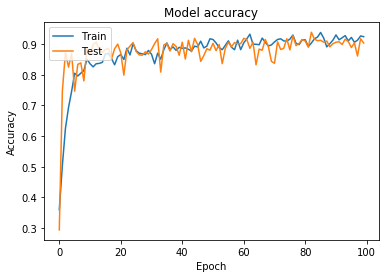

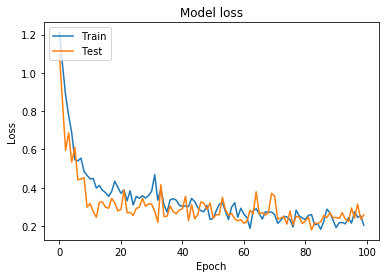

In [25]:
graph()

In [26]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_set)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
  ...
    to  
  ['...']
41/41 [==============================] - 58s 1s/step - loss: 0.2465 - accuracy: 0.9084 - Precision: 0.9137 - Recall: 0.9037 - TruePositives: 1164.0000 - TrueNegatives: 2466.0000 - FalsePositives: 110.0000 - FalseNegatives: 124.0000
Test Accuracy: 90.83850979804993


In [27]:
precision=scores[2]
recall=scores[3]
true_positives=scores[3]
true_negatives=scores[4]
false_positives=scores[5]
false_negatives=scores[6]

In [28]:
confution_matrix=[[true_positives,false_positives],[false_negatives,true_negatives]]

In [29]:
print(f"Accuracy                     : {scores[1]*100}")
print("")
print("Confution Matrix             : ",confution_matrix)
print("")
print("precision Score              : ",precision)
print("")
print("Recall or Sensitivity Score  : ",recall)
print("")
f1=(precision*recall)/(precision+recall)
F1_Score=2*f1
print("F1 Score                     : ",F1_Score)
print("")
Specifisity=true_negatives/true_negatives+false_positives
print("Specifisity Score            : ",Specifisity)

Accuracy                     : 90.83850979804993

Confution Matrix             :  [[0.9037267, 2466.0], [110.0, 1164.0]]

precision Score              :  0.9136578

Recall or Sensitivity Score  :  0.9037267

F1 Score                     :  0.908665120601654

Specifisity Score            :  2467.0


In [30]:
import h5py

In [31]:
model.save('covid8.h5')

In [32]:
import tensorflow as tf
from tensorflow.keras.models import load_model

In [33]:
classifierLoad=tf.keras.models.load_model('covid8.h5')

In [34]:
import numpy as np

In [35]:
from tensorflow.keras.preprocessing import image
test_image=image.load_img('c.jpg',target_size=(224,224))

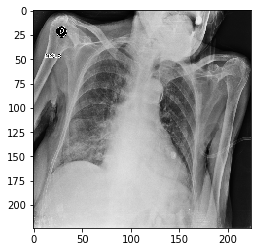

In [36]:
import matplotlib.pyplot as plt
img = plt.imshow(test_image)

In [37]:
test_image=image.img_to_array(test_image)

In [38]:
test_image=np.expand_dims(test_image,axis=0)

In [39]:
result=classifierLoad.predict(test_image)

In [40]:
prediction = result[0]

In [41]:
classes=training_set.class_indices

In [42]:
classes

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [43]:
prediction=list(prediction)

In [44]:
prediction

[1.0, 0.0, 0.0]

In [45]:
classes=['COVID19', 'NORMAL', 'PNEUMONIA']

In [46]:
output=zip(classes,prediction)

In [47]:
output=dict(output)

In [48]:
output

{'COVID19': 1.0, 'NORMAL': 0.0, 'PNEUMONIA': 0.0}

In [49]:
if output['COVID19']==1.0 :
    print("COVID19")
elif output['NORMAL']==1.0:
    print("NORMAL")
elif output['PNEUMONIA']==1.0:
    print("PNEUMONIA")

COVID19
